In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv


In [2]:
# Import Python Packages
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [3]:

COVID19_line_list_data = pd.read_csv("../input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv")
COVID19_open_line_list = pd.read_csv("../input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv")
covid_19_data = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")
time_series_covid_19_confirmed = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
time_series_covid_19_deaths = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")
time_series_covid_19_recovered = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv")

**Import dataset by using pandas library and use the read_csv method to extract the data from the dataset.**

**Using head method vizualize dataset. **

In [4]:
COVID19_line_list_data.head

<bound method NDFrame.head of         id  case_in_country reporting date  Unnamed: 3  \
0        1              NaN      1/20/2020         NaN   
1        2              NaN      1/20/2020         NaN   
2        3              NaN      1/21/2020         NaN   
3        4              NaN      1/21/2020         NaN   
4        5              NaN      1/21/2020         NaN   
...    ...              ...            ...         ...   
1080  1081              2.0      2/25/2020         NaN   
1081  1082              1.0      2/24/2020         NaN   
1082  1083              1.0      2/26/2020         NaN   
1083  1084              1.0      2/25/2020         NaN   
1084  1085              1.0      2/25/2020         NaN   

                                                summary             location  \
0     First confirmed imported COVID-19 pneumonia pa...  Shenzhen, Guangdong   
1     First confirmed imported COVID-19 pneumonia pa...             Shanghai   
2     First confirmed imported ca

In [5]:
time_series_covid_19_confirmed.head

<bound method NDFrame.head of        Province/State  Country/Region      Lat      Long  1/22/20  1/23/20  \
0               Anhui  Mainland China  31.8257  117.2264        1        9   
1             Beijing  Mainland China  40.1824  116.4142       14       22   
2           Chongqing  Mainland China  30.0572  107.8740        6        9   
3              Fujian  Mainland China  26.0789  117.9874        1        5   
4               Gansu  Mainland China  36.0611  103.8343        0        2   
..                ...             ...      ...       ...      ...      ...   
399  Saint Barthelemy          France  17.9000  -62.8333        0        0   
400               NaN         Jamaica  18.1096  -77.2975        0        0   
401               NaN         Reunion -21.1151   55.5364        0        0   
402               NaN          Turkey  38.9637   35.2433        0        0   
403         Gibraltar  United Kingdom  36.1408   -5.3536        0        0   

     1/24/20  1/25/20  1/26/20  1

In [6]:
covid_19_data.head

<bound method NDFrame.head of        SNo ObservationDate Province/State                  Country/Region  \
0        1      01/22/2020          Anhui                  Mainland China   
1        2      01/22/2020        Beijing                  Mainland China   
2        3      01/22/2020      Chongqing                  Mainland China   
3        4      01/22/2020         Fujian                  Mainland China   
4        5      01/22/2020          Gansu                  Mainland China   
...    ...             ...            ...                             ...   
4930  4931        03/11/20    Mississippi                              US   
4931  4932        03/11/20   North Dakota                              US   
4932  4933        03/11/20  West Virginia                              US   
4933  4934        03/11/20        Wyoming                              US   
4934  4935        03/11/20            NaN  occupied Palestinian territory   

              Last Update  Confirmed  Deaths 

In [7]:
covid_19_data.shape

(4935, 8)

In [8]:
covid_19_data.head(50)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26,0,0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2,0,0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1,0,0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4,0,0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1,0,0


# Drop the rows with na or missing values

In [9]:
covid_19_data = covid_19_data.dropna(axis=0)

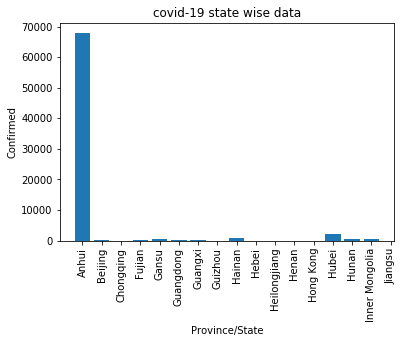

In [10]:
x=[]
y=[]
labels = covid_19_data['Country/Region']
count = covid_19_data['Confirmed']
plt.xticks(np.arange(0,35), covid_19_data['Province/State'], rotation=90)
x=list(labels)
y=list(count)
plt.title("covid-19 state wise data")
plt.xlabel("Province/State")
plt.ylabel("Confirmed")
plt.bar(x,y)
plt.show()

# Cleaning Data 

In [11]:
# cases 
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']

# Active Case = confirmed - deaths - recovered
covid_19_data['Active'] = covid_19_data['Confirmed'] - covid_19_data['Deaths'] - covid_19_data['Recovered']

# replacing Mainland china with just China
covid_19_data['Country/Region'] = covid_19_data['Country/Region'].replace('Mainland China', 'China')

# filling missing values 
covid_19_data[['Province/State']] = covid_19_data[['Province/State']].fillna('')
covid_19_data[cases] = covid_19_data[cases].fillna(0)

In [12]:
covid_19_data.head(50)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
0,1,01/22/2020,Anhui,China,1/22/2020 17:00,1,0,0,1
1,2,01/22/2020,Beijing,China,1/22/2020 17:00,14,0,0,14
2,3,01/22/2020,Chongqing,China,1/22/2020 17:00,6,0,0,6
3,4,01/22/2020,Fujian,China,1/22/2020 17:00,1,0,0,1
4,5,01/22/2020,Gansu,China,1/22/2020 17:00,0,0,0,0
5,6,01/22/2020,Guangdong,China,1/22/2020 17:00,26,0,0,26
6,7,01/22/2020,Guangxi,China,1/22/2020 17:00,2,0,0,2
7,8,01/22/2020,Guizhou,China,1/22/2020 17:00,1,0,0,1
8,9,01/22/2020,Hainan,China,1/22/2020 17:00,4,0,0,4
9,10,01/22/2020,Hebei,China,1/22/2020 17:00,1,0,0,1


In [13]:
# latest
covid_19_data_latest = covid_19_data[covid_19_data['ObservationDate'] == max(covid_19_data['ObservationDate'])].reset_index()
china_latest = covid_19_data_latest[covid_19_data_latest['Country/Region']=='China']
row_latest = covid_19_data_latest[covid_19_data_latest['Country/Region']!='China']
# latest condensed
covid_19_data_latest_grouped = covid_19_data_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
china_latest_grouped = china_latest.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
row_latest_grouped = row_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

In [14]:
covid_19_data.head(25)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
0,1,01/22/2020,Anhui,China,1/22/2020 17:00,1,0,0,1
1,2,01/22/2020,Beijing,China,1/22/2020 17:00,14,0,0,14
2,3,01/22/2020,Chongqing,China,1/22/2020 17:00,6,0,0,6
3,4,01/22/2020,Fujian,China,1/22/2020 17:00,1,0,0,1
4,5,01/22/2020,Gansu,China,1/22/2020 17:00,0,0,0,0
5,6,01/22/2020,Guangdong,China,1/22/2020 17:00,26,0,0,26
6,7,01/22/2020,Guangxi,China,1/22/2020 17:00,2,0,0,2
7,8,01/22/2020,Guizhou,China,1/22/2020 17:00,1,0,0,1
8,9,01/22/2020,Hainan,China,1/22/2020 17:00,4,0,0,4
9,10,01/22/2020,Hebei,China,1/22/2020 17:00,1,0,0,1


# After grouping the province/state based country/region

In [15]:
temp = covid_19_data.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].max()
temp.style.background_gradient(cmap='Reds')

# Total active cases across the world

In [16]:
temp = covid_19_data.groupby('ObservationDate')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp = temp[temp['ObservationDate']==max(temp['ObservationDate'])].reset_index(drop=True)
temp.style.background_gradient(cmap='autumn')

,ObservationDate,Confirmed,Deaths,Recovered,Active
0,03/11/20,86321,3264,62038,21019


# Country Wise data

In [17]:
temp_f = covid_19_data_latest_grouped.sort_values(by='Confirmed', ascending=False)
temp_f = temp_f.reset_index(drop=True)
temp_f.style.background_gradient(cmap='autumn')

,Country/Region,Confirmed,Deaths,Recovered,Active
0,China,80921,3161,61644,16116
1,France,2284,48,12,2224
2,US,1281,36,8,1237
3,Others,696,7,325,364
4,UK,459,8,19,432
5,Denmark,444,0,1,443
6,Australia,128,3,21,104
7,Canada,108,1,8,99


# Province/State wise data

In [18]:
temp_f = china_latest_grouped[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
temp_f = temp_f.sort_values(by='Confirmed', ascending=False)
temp_f = temp_f.reset_index(drop=True)
temp_f.style.background_gradient(cmap='Reds')

,Province/State,Confirmed,Deaths,Recovered
0,Hubei,67773,3046,49134
1,Guangdong,1356,8,1282
2,Henan,1273,22,1249
3,Zhejiang,1215,1,1195
4,Hunan,1018,4,995
5,Anhui,990,6,984
6,Jiangxi,935,1,932
7,Shandong,760,6,726
8,Jiangsu,631,0,627
9,Chongqing,576,6,554
